### Loading Data and summary Statistics and missing Values

In [95]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqline
import scipy.stats as scistat
import matplotlib.pyplot as plt
import seaborn as sns

In [232]:
df =pd.read_csv('Data/911_Finance_Data.csv')

In [233]:
df.head(3)

,_id,ETSB Name,Report Year,Population,Contact,Contact Email,Contact Phone,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge,...,Vehicle,Mobile Data Terminals,Software Licenses,Voice/Data Logging Recorder,Other Personnel Cost,Radio Ciruits,Conferences,Certifications,Public Education,Mapping/Addressing/GIS Professional Services
0,1,Zion E9-1-1 ETSB,2014,"24,413",John Lewis,johnl@zion.il.us,847-746-4042,109156.0,54680.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Zion E9-1-1 ETSB,2015,"24,413",John Lewis,johnl@zion.il.us,847.746.4042,108526.0,54364.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Zion E9-1-1 ETSB,2016,"24,413",(*blank*),johnl@zion.il.us,(*blank*),117555.0,58866.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
df.sample(5)

,_id,ETSB Name,Report Year,Population,Contact,Contact Email,Contact Phone,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge,...,Vehicle,Mobile Data Terminals,Software Licenses,Voice/Data Logging Recorder,Other Personnel Cost,Radio Ciruits,Conferences,Certifications,Public Education,Mapping/Addressing/GIS Professional Services
253,254,Cumberland County E9-1-1,2019,"11,048",Donna Olmstead,cumbco911@cumberlandco.org,217-849-2065,208370.23,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1043,1044,Putnam County 9-1-1,2018,"6,250",Lynn A. Haage,lhaage@putnamcountysheriff.com,815-925-9251,198520.00,0.00,0.0,...,0.0,0.0,0.0,3750.0,0.0,0.0,1314.0,0.0,0.0,0.0
423,424,Glencoe ETSB,2014,"8,762",Lt. Michael Neimark,mneimark@villageofglencoe.org,847-835-4112,57452.00,89975.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1098,1099,Saline County 9-1-1,2013,"24,946",Lt. Tracy L. Felty,salinee911@yahoo.com,6182528661,151852.00,120918.02,506.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,668,Lee County ETSB,2014,"36,000",DIRECTOR SHELLEY DALLAS,sdallas@countyoflee.org,815-288-5911,187110.00,150573.00,61480.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
df.shape

(1389, 64)

In [100]:
df.columns

Index(['_id', 'ETSB Name', 'Report Year', 'Population', 'Contact',
       'Contact Email', 'Contact Phone', 'Illinois Surcharge',
       'Wireline Surcharge', 'VoIP Surcharge', 'Local Funds', 'Grant Funds',
       'Interest Income', 'Contractual Services Revenue', 'Other Revenue',
       'BOY Reserve Balance', 'Expenses Not Classified Above',
       'Operating Expenses', 'Primary PSAPS', 'Secondary PSAPS',
       'Infrastructure', 'Call Taking', 'Radio', 'CAD', 'Mapping', 'EMD',
       'Other Equipment/Software', 'Coordinator/Director Salary',
       'Telecommunicators Salaries', 'Mapping/GIS Salaries',
       'Technical/IT Salaries', 'Other Salaries', 'Fringe Benefits',
       'Capital Improvements', 'Leases', 'Utilities', 'Emergency Backup',
       'Insurance', 'Furniture/Fixtures', 'Office Supplies',
       'Other Facility Costs', 'Telephone/9-1-1 Trunks', 'NG 9-1-1/ESInet',
       'Microwave/Broadband', 'Training/Memberships', 'Travel',
       'Membership Dues', 'Legal', 'Audit', '

In [163]:
SuperCharge=df.loc[:, ['Illinois Surcharge', 'Wireline Surcharge','VoIP Surcharge']]

In [164]:
SuperCharge=df[['Illinois Surcharge', 'Wireline Surcharge','VoIP Surcharge']]

In [165]:
SuperCharge.head()

,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge
0,109156.00,54680.0,0.0
1,108526.00,54364.0,0.0
2,117555.00,58866.0,0.0
3,401537.91,0.0,0.0
4,366717.81,0.0,0.0


In [166]:
SuperCharge.describe()

,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge
count,1.284000e+03,1.284000e+03,1284.000000
mean,9.659475e+05,2.057716e+05,15189.370974
std,5.754806e+06,1.922693e+06,67742.734110
min,2.490000e+02,0.000000e+00,0.000000
25%,1.042941e+05,0.000000e+00,0.000000
50%,2.486198e+05,2.146071e+04,0.000000
75%,6.159677e+05,1.148850e+05,440.100000
max,1.529753e+08,4.095409e+07,845674.350000


In [167]:
SuperCharge.isnull().sum().sort_values(ascending=False)

Illinois Surcharge    0
Wireline Surcharge    0
VoIP Surcharge        0
dtype: int64

In [168]:
SuperCharge.dtypes

Illinois Surcharge    float64
Wireline Surcharge    float64
VoIP Surcharge        float64
dtype: object

In [169]:
nu_var =SuperCharge.columns[SuperCharge.dtypes !='object']

In [170]:
Cat_Var =SuperCharge.columns[SuperCharge.dtypes =='object']

In [171]:
print(nu_var)
print(Cat_Var)

Index(['Illinois Surcharge', 'Wireline Surcharge', 'VoIP Surcharge'], dtype='object')
Index([], dtype='object')


In [239]:
Missing=SuperCharge==0

In [240]:
Missing

,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge
0,False,False,True
1,False,False,True
2,False,False,True
3,False,True,True
4,False,True,True
...,...,...,...
1384,False,True,True
1385,False,True,True
1386,False,True,True
1387,False,True,True


In [174]:
missing1=SuperCharge[SuperCharge == 0]

In [175]:
missing1

,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge
0,NaN,NaN,0.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,0.0,0.0
4,NaN,0.0,0.0
...,...,...,...
1384,NaN,0.0,0.0
1385,NaN,0.0,0.0
1386,NaN,0.0,0.0
1387,NaN,0.0,0.0


In [ ]:
SuperCharge['Illinois Surcharge'].value_counts()[0]

In [242]:
SuperCharge['Wireline Surcharge'].value_counts()[0]

599

In [243]:
SuperCharge['VoIP Surcharge'].value_counts()[0]

939

In [182]:
df = SuperCharge[SuperCharge['Illinois Surcharge']!= 0]

In [183]:
df

,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge
0,109156.00,54680.0,0.0
1,108526.00,54364.0,0.0
2,117555.00,58866.0,0.0
3,401537.91,0.0,0.0
4,366717.81,0.0,0.0
...,...,...,...
1384,420000.00,0.0,0.0
1385,608635.00,0.0,0.0
1386,656291.24,0.0,0.0
1387,676234.00,0.0,0.0


In [184]:
df1 = SuperCharge[SuperCharge['Wireline Surcharge']!= 0]

In [185]:
df1

,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge
0,109156.0,54680.0,0.0
1,108526.0,54364.0,0.0
2,117555.0,58866.0,0.0
18,156010.0,40762.0,14546.0
19,134933.0,33836.0,15902.0
...,...,...,...
1380,242936.0,172914.0,0.0
1381,230593.0,162400.0,0.0
1382,222135.0,146278.0,0.0
1383,207544.0,146836.0,0.0


In [186]:
df2 = SuperCharge[SuperCharge['VoIP Surcharge']!= 0]

In [187]:
df2

,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge
18,156010.00,40762.00,14546.00
19,134933.00,33836.00,15902.00
21,135305.00,25327.00,20890.00
27,17804.47,28264.04,12769.05
28,16776.29,26684.65,13528.55
...,...,...,...
1345,229082.81,187253.93,5673.81
1373,40654.00,22276.00,1517.00
1374,40491.03,21406.21,1376.43
1375,40491.03,21406.21,1376.43


In [191]:
df2

,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge
18,156010.00,40762.00,14546.00
19,134933.00,33836.00,15902.00
21,135305.00,25327.00,20890.00
27,17804.47,28264.04,12769.05
28,16776.29,26684.65,13528.55
...,...,...,...
1345,229082.81,187253.93,5673.81
1373,40654.00,22276.00,1517.00
1374,40491.03,21406.21,1376.43
1375,40491.03,21406.21,1376.43


### Displaying 20 quantiles for the "Surcharge" columns, from 0% to 100% in steps of 5%..

In [155]:
IllSurcharge=df2['Illinois Surcharge']

In [156]:
IllSurcharge.quantile(np.arange(0, 1, 0.05))

0.00    0.000000e+00
0.05    2.261700e+03
0.10    2.629490e+04
0.15    4.381072e+04
0.20    6.027300e+04
0.25    7.218493e+04
0.30    8.555400e+04
0.35    9.338560e+04
0.40    1.022601e+05
0.45    1.085139e+05
0.50    1.307757e+05
0.55    1.608320e+05
0.60    1.946050e+05
0.65    2.191420e+05
0.70    2.483577e+05
0.75    2.836315e+05
0.80    3.332978e+05
0.85    4.570968e+05
0.90    6.773118e+05
0.95    1.672615e+06
Name: Illinois Surcharge, dtype: float64

In [157]:
WireSurcharge=df2['Wireline Surcharge']

In [158]:
WireSurcharge.quantile(np.arange(0, 1, 0.05))

0.00         0.0000
0.05     11119.6500
0.10     21406.2100
0.15     27129.1240
0.20     39496.9320
0.25     48922.6650
0.30     66658.6690
0.35     79522.6430
0.40     91180.8000
0.45    100324.7385
0.50    109237.8950
0.55    114836.6500
0.60    121344.8120
0.65    131244.8000
0.70    145912.8000
0.75    165251.7500
0.80    190863.9520
0.85    218613.5500
0.90    363602.3000
0.95    699374.3500
Name: Wireline Surcharge, dtype: float64

In [159]:
VoISurcharge=df2['VoIP Surcharge']

In [160]:
VoISurcharge.quantile(np.arange(0, 1, 0.05))

0.00         8.0000
0.05       349.2000
0.10       619.5480
0.15      1241.1990
0.20      1877.6000
0.25      3455.4725
0.30      5216.0460
0.35      7358.6500
0.40     10855.8000
0.45     13494.5525
0.50     18081.8850
0.55     21376.7580
0.60     25730.0380
0.65     29684.4105
0.70     35910.5420
0.75     43909.7500
0.80     56997.1520
0.85     88459.2875
0.90    132604.2370
0.95    265258.6000
Name: VoIP Surcharge, dtype: float64

In [150]:
SurchargemissingIll=SuperCharge[SuperCharge == 0]

In [151]:
Missing.sum(axis=0)

Illinois Surcharge     105
Wireline Surcharge     618
VoIP Surcharge        1029
Local Funds           1139
Grant Funds           1252
dtype: int64

In [40]:
MissingRow=Missing.sum(axis=1)

In [41]:
MissingRow

0       1
1       1
2       1
3       2
4       2
       ..
1384    2
1385    2
1386    2
1387    2
1388    1
Length: 1389, dtype: int64

### Showing all rows that contain 3 or more missing values.

In [161]:
df2.loc[IllSurcharge>3, :]

,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge,Local Funds,Grant Funds
18,156010.00,40762.00,14546.00,0.0,0.0
19,134933.00,33836.00,15902.00,0.0,0.0
21,135305.00,25327.00,20890.00,0.0,0.0
27,17804.47,28264.04,12769.05,0.0,0.0
28,16776.29,26684.65,13528.55,0.0,0.0
...,...,...,...,...,...
1345,229082.81,187253.93,5673.81,0.0,0.0
1373,40654.00,22276.00,1517.00,0.0,0.0
1374,40491.03,21406.21,1376.43,0.0,0.0
1375,40491.03,21406.21,1376.43,0.0,0.0


In [162]:
df2.loc[WireSurcharge>3, :]

,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge,Local Funds,Grant Funds
18,156010.00,40762.00,14546.00,0.0,0.0
19,134933.00,33836.00,15902.00,0.0,0.0
21,135305.00,25327.00,20890.00,0.0,0.0
27,17804.47,28264.04,12769.05,0.0,0.0
28,16776.29,26684.65,13528.55,0.0,0.0
...,...,...,...,...,...
1345,229082.81,187253.93,5673.81,0.0,0.0
1373,40654.00,22276.00,1517.00,0.0,0.0
1374,40491.03,21406.21,1376.43,0.0,0.0
1375,40491.03,21406.21,1376.43,0.0,0.0


In [154]:
df2.loc[VoISurcharge>3, :]

,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge,Local Funds,Grant Funds
18,156010.00,40762.00,14546.00,0.0,0.0
19,134933.00,33836.00,15902.00,0.0,0.0
21,135305.00,25327.00,20890.00,0.0,0.0
27,17804.47,28264.04,12769.05,0.0,0.0
28,16776.29,26684.65,13528.55,0.0,0.0
...,...,...,...,...,...
1351,0.00,0.00,212.00,0.0,0.0
1373,40654.00,22276.00,1517.00,0.0,0.0
1374,40491.03,21406.21,1376.43,0.0,0.0
1375,40491.03,21406.21,1376.43,0.0,0.0


In [ ]:
df4.loc[VoISurcharge>3, :]

In [ ]:
df2.loc[VoISurcharge>3, :]

### Testing all "Surcharge" columns for normality

In [43]:
 # Testing for Normality

def testnorm(var, df2):
    stat, p = scistat.shapiro(df2[var])
    return p

In [44]:
testnorm("Illinois Surcharge", df2)

3.154043242708969e-32

Illinois Surcharge is not Normal,The test statistic is less than 0.05

In [45]:
testnorm("Wireline Surcharge", df2)

9.54585108065476e-32

Wireline Surcharge is not Normal,The test statistic is less than 0.05

In [46]:
testnorm("VoIP Surcharge", df2)

2.5029138233245104e-31

 VoIP Surcharge is not Normal,The test statistic is less than 0.05

### Using the Inter-Quartile Ranges to find all outliers in  numeric columns. 

In [47]:
thirdQ = df2['Illinois Surcharge'].quantile(0.75)
firstQ = df2['Illinois Surcharge'].quantile(0.25)

outlierRange = 1.5*(thirdQ - firstQ)

In [48]:
thirdQ = df['Illinois Surcharge'].quantile(0.75)
firstQ = df['Illinois Surcharge'].quantile(0.25)

outlierRange = 1.5*(thirdQ - firstQ)

In [49]:
outlierTop = thirdQ + outlierRange

In [50]:
outlierTop

1383478.13875

In [51]:
outlierBottom = firstQ - outlierRange

In [52]:
outlierBottom

-663216.3312499999

In [53]:
def getOuliers():
    dfOut = pd.DataFrame(columns=df2.columns, data=None)
    
    for col in df2.columns[1:]:
        thirdQ = df2[col].quantile(0.75)
        firstQ = df2[col].quantile(0.25)
        outlierRange = 1.5*(thirdQ - firstQ)
        lowOutlier = firstQ - outlierRange
        highOutlier = thirdQ + outlierRange
        
        df = df2.loc[(df2[col] > highOutlier) | (SuperCharge[col] < lowOutlier)]
        
        df = df.assign(varname = col, threshlow = lowOutlier, threshhigh = highOutlier)
        
        dfOut = pd.concat([dfOut, df])
    
    return dfOut

In [54]:
outliers = getOuliers()

In [214]:
outliers


,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge,varname,threshlow,threshhigh
215,332691.00,403290.00,42510.00,Wireline Surcharge,-125570.96250,339745.37750
216,400003.00,368872.00,40589.08,Wireline Surcharge,-125570.96250,339745.37750
217,413120.00,367511.00,43774.00,Wireline Surcharge,-125570.96250,339745.37750
218,483535.00,449052.00,3023.00,Wireline Surcharge,-125570.96250,339745.37750
223,1519525.00,771087.00,297820.00,Wireline Surcharge,-125570.96250,339745.37750
...,...,...,...,...,...,...
1313,246206.00,0.00,129109.00,VoIP Surcharge,-57225.94375,104591.16625
1334,4009320.00,1263625.00,601100.00,VoIP Surcharge,-57225.94375,104591.16625
1335,3722906.00,1106223.00,667697.00,VoIP Surcharge,-57225.94375,104591.16625
1336,3661357.00,990270.00,724895.00,VoIP Surcharge,-57225.94375,104591.16625


In [56]:
outliers.varname.value_counts()

VoIP Surcharge        48
Wireline Surcharge    39
Name: varname, dtype: int64

### Histogram for the "Illinois Surcharge" column.

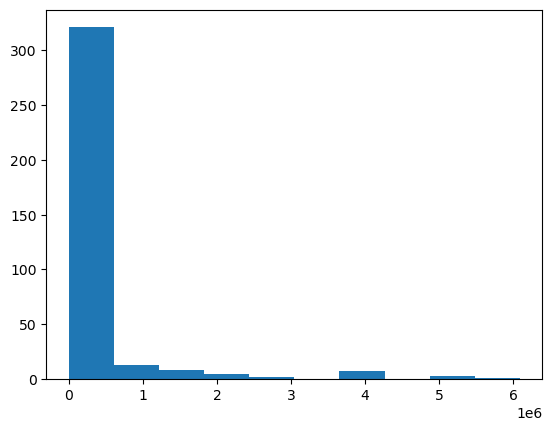

In [57]:
plt.hist(df2["Illinois Surcharge"],bins=10)
plt.show()

### Correlation matrix.

In [ ]:
df3=df[['Illinois Surcharge', 'Wireline Surcharge','VoIP Surcharge','Local Funds', 'Grant Funds']]

In [195]:
df3.corr(method="pearson")

,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge,Local Funds,Grant Funds
Illinois Surcharge,1.000000,0.495794,0.406295,0.102587,0.046415
Wireline Surcharge,0.495794,1.000000,0.532819,-0.189674,-0.052822
VoIP Surcharge,0.406295,0.532819,1.000000,-0.092351,-0.044508
Local Funds,0.102587,-0.189674,-0.092351,1.000000,0.130176
Grant Funds,0.046415,-0.052822,-0.044508,0.130176,1.000000


### Choosing two columns from the dataset that have strong correlation and Showing a crosstab of two columns.

In [ ]:
df2['Wireline_Surcharge_q'] = pd.qcut(df2['Wireline Surcharge'],
                                          labels = ['very low', 'low', 'medium', 'high', 'very high']
                                          , q = 5
                                          , precision=0,duplicates="drop")


df2['VoIP_Surcharge_q'] = pd.qcut(df2['VoIP Surcharge'],
                                          labels = ['very low', 'low', 'medium', 'high', 'very high']
                                          , q = 5
                                          , precision=0,duplicates="drop")

In [199]:
df2

,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge,Wireline_Surcharge_q,Illinois_Surcharge_q,VoIP_Surcharge_q
18,156010.00,40762.00,14546.00,low,medium,medium
19,134933.00,33836.00,15902.00,very low,medium,medium
21,135305.00,25327.00,20890.00,very low,medium,medium
27,17804.47,28264.04,12769.05,very low,medium,medium
28,16776.29,26684.65,13528.55,very low,medium,medium
...,...,...,...,...,...,...
1345,229082.81,187253.93,5673.81,high,low,low
1373,40654.00,22276.00,1517.00,very low,very low,very low
1374,40491.03,21406.21,1376.43,very low,very low,very low
1375,40491.03,21406.21,1376.43,very low,very low,very low


In [227]:
pd.crosstab(df2['Wireline_Surcharge_q'], df2['VoIP_Surcharge_q'])

VoIP_Surcharge_q,very low,low,medium,high,very high
Wireline_Surcharge_q,,,,,
very low,9,21,29,8,2
low,20,6,22,15,6
medium,22,13,13,16,5
high,13,6,2,22,26
very high,5,23,3,8,30


In [236]:
df2.loc[(df2['Wireline_Surcharge_q']=='very high') & (df2['VoIP_Surcharge_q']=='very low')]

,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge,Wireline_Surcharge_q,Illinois_Surcharge_q,VoIP_Surcharge_q
327,237287.42,418504.11,1568.50,very high,very low,very low
328,225384.61,398801.19,1547.14,very high,very low,very low
330,198826.95,372024.07,1595.15,very high,very low,very low
581,2371296.00,842765.00,1708.00,very high,very low,very low
582,1512684.00,797915.87,1708.00,very high,very low,very low


### Scatterplot,Identifying the outliers on the scatterplot and Displaying the rows that appear to be outliers, based on the scatterplot data.

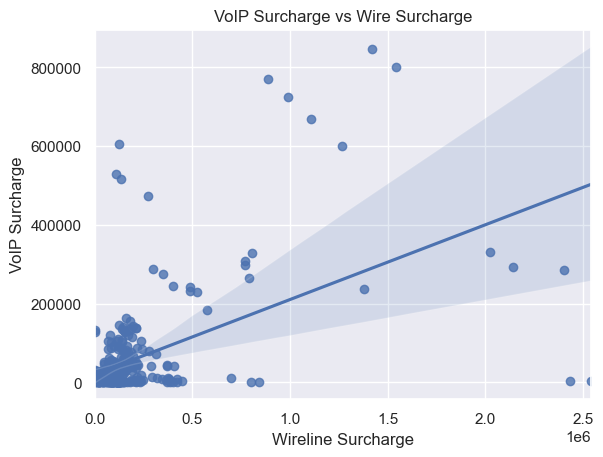

In [205]:
myPlotData = sns.regplot(x='Wireline Surcharge', y='VoIP Surcharge', data=df2)
myPlotData.set(xlabel="Wireline Surcharge", ylabel="VoIP Surcharge", title="VoIP Surcharge vs Wire Surcharge")
plt.show()

In [217]:
df.loc[(df['VoIP Surcharge']>0.5) & (df['Wireline Surcharge']>200000)]

,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge
93,202082.00,216750.02,88235.75
95,183905.35,218168.13,47723.46
176,244104.00,233185.00,2393.00
177,218406.00,209912.00,2324.00
178,204051.56,204893.51,3638.32
...,...,...,...
1336,3661357.00,990270.00,724895.00
1337,3716499.34,887890.76,769207.83
1342,269458.00,248073.00,6610.00
1343,252986.00,218353.00,6566.00


### End Thank you